In [3]:
import numpy as np
from fractals import FractalFeature
from fractals import GdalFractal
from matplotlib import pyplot as plt
import fiona
import geopandas as gpd
from osgeo import gdal
from scipy.stats import linregress
import os
from PIL import Image


# FractalFeature
FractalFeature is a class that is used for calculating the box counting dimension of different features.  It consists of a 2d array representing the "highest" resolution covering a feature, an associated size, and then a list of coverings, which are other FractalFeature objects that represent the same feature but with different covering sizes.  Below is a very simple example feature, with 1's where the feature exists in space, and 0 where it doesn't.

In [9]:
feature = np.array([[1,0,0,0,0,0],
                   [1,1,0,0,0,0],
                   [0,1,0,0,0,0],
                   [0,1,1,1,0,0],
                   [0,0,0,1,0,0],
                   [0,0,0,1,1,0],
                   [0,0,0,0,1,0],
                   [0,0,0,0,1,0]])

In [4]:
ff=FractalFeature(feature)

In [14]:
np.mean(feature)*feature.shape[0]*feature.shape[1]

12.0

12

Now that we have made our FractalFeature object, we can add coverings

In [5]:
ff.add_covering(None, 2,2)
ff.add_covering(None, 2,3)
ff.add_covering(None, 3,2)
ff.add_covering(None, 3,3)

In [6]:
for covering in ff.coverings:
    print(covering.feature_raster)

[[1 0 0 0 0 0]
 [1 1 0 0 0 0]
 [0 1 0 0 0 0]
 [0 1 1 1 0 0]
 [0 0 0 1 0 0]
 [0 0 0 1 1 0]
 [0 0 0 0 1 0]
 [0 0 0 0 1 0]]
[[1 0 0]
 [1 1 0]
 [0 1 1]
 [0 0 1]]
[[1. 0. 0.]
 [1. 1. 1.]
 [0. 0. 1.]]
[[1 0]
 [1 1]
 [0 1]
 [0 1]]
[[1. 0.]
 [1. 1.]
 [0. 1.]]


And lastly we can plot box covering size and number of boxes needed to cover, to determine fractal dimension of a feature.

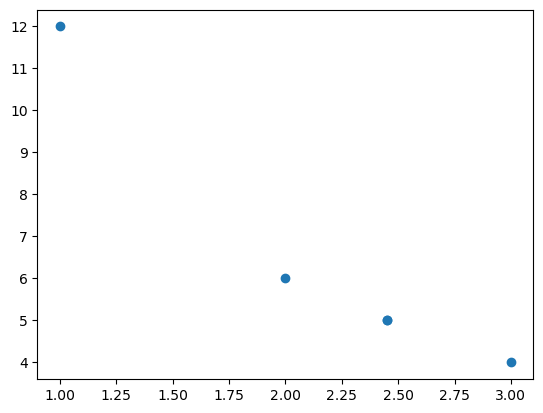

In [7]:
box_size, number_of_boxes=ff.return_covering_points()
plt.scatter(box_size, number_of_boxes)

# Coastlines
Below is an example using an array representing the coastline of Iceland

In [8]:
iceland_shape_path="/home/jo/cub/research/data/coastlines/Europe_coastline_poly.shp"
iceland_fractal_directory = "/home/jo/cub/research/projects/fractals/iceland_data"

In [9]:
iceland_fractal = GdalFractal(iceland_shape_path, iceland_fractal_directory, 100)

/home/jo/miniconda3/lib/python3.11/site-packages/osgeo/gdal.py:287: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


/home/jo/cub/research/projects/fractals/iceland_data/fractal_100.tif


In [10]:
iceland_fractal.return_covering_points()

(array([100]), array([4.79451409e+09]))

In [12]:
iceland_fractal.add_covering(1000)

/home/jo/cub/research/projects/fractals/iceland_data/fractal_1000.tif


In [13]:
iceland_fractal.add_covering(200)
iceland_fractal.add_covering(500)
iceland_fractal.add_covering(2000)
iceland_fractal.add_covering(5000)


/home/jo/cub/research/projects/fractals/iceland_data/fractal_200.tif
/home/jo/cub/research/projects/fractals/iceland_data/fractal_500.tif
/home/jo/cub/research/projects/fractals/iceland_data/fractal_2000.tif
/home/jo/cub/research/projects/fractals/iceland_data/fractal_5000.tif


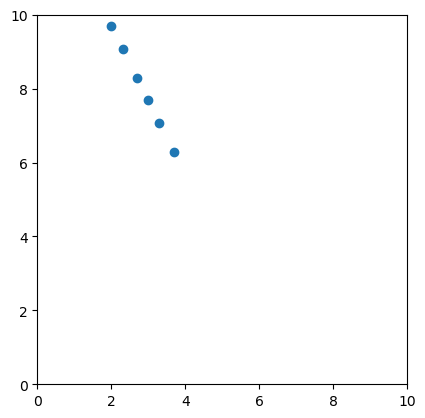

In [60]:
iceland_box_size, iceland_number_of_boxes=iceland_fractal.return_covering_points()
plt.scatter(np.log10(iceland_box_size), np.log10(iceland_number_of_boxes))
plt.xlim(0,10), plt.ylim(0,10)
ax=plt.gca()
ax.set_aspect('equal', adjustable='box')

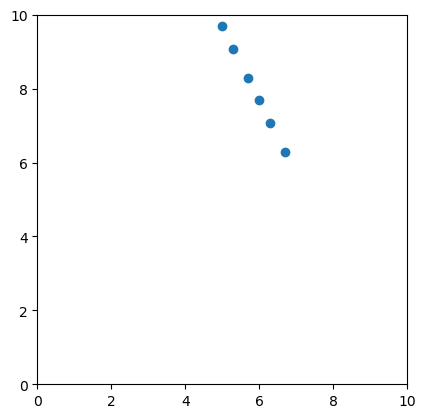

In [61]:
iceland_box_size, iceland_number_of_boxes=iceland_fractal.return_covering_points()
plt.scatter(np.log10(iceland_box_size*1000), np.log10(iceland_number_of_boxes))
plt.xlim(0,10), plt.ylim(0,10)
ax=plt.gca()
ax.set_aspect('equal', adjustable='box')

In [57]:
iceland_reg = linregress(np.log10(iceland_box_size),np.log10(iceland_number_of_boxes))

In [58]:
iceland_reg

LinregressResult(slope=-1.9996565194852651, intercept=13.679949091384493, rvalue=-0.9999999936024199, pvalue=6.139354719349775e-17, stderr=0.0001130962683622253, intercept_stderr=0.0003269973989715007)

In [30]:
np.log(iceland_number_of_boxes)


array([22.2907382 , 17.68583865, 20.90448777, 19.07199415, 16.29969445,
       14.46827992])

In [31]:
np.log(iceland_box_size)

array([4.60517019, 6.90775528, 5.29831737, 6.2146081 , 7.60090246,
       8.51719319])

In [ ]:
for file in os.listdir(iceland_fractal.raster_directory):
    path = os.path.join(iceland_fractal.raster_directory, file)
    imgds = gdal.Open(path)
    imgarr = imgds.ReadAsArray()
    plt.imshow(imgarr)

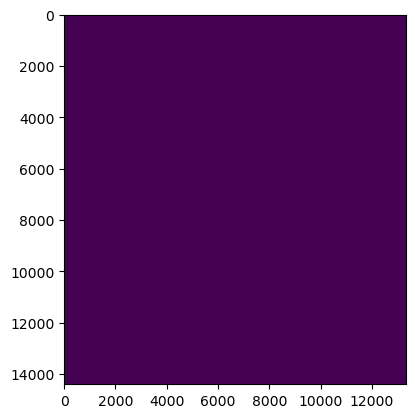

In [7]:
path = "/home/jo/cub/research/projects/fractals/iceland_data/fractal_500.tif"
imgds = gdal.Open(path)
imgarr = imgds.ReadAsArray()
plt.imshow(imgarr,vmax=1)

(array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.91805836e+08, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00]),
 array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5]),
 <BarContainer object of 10 artists>)

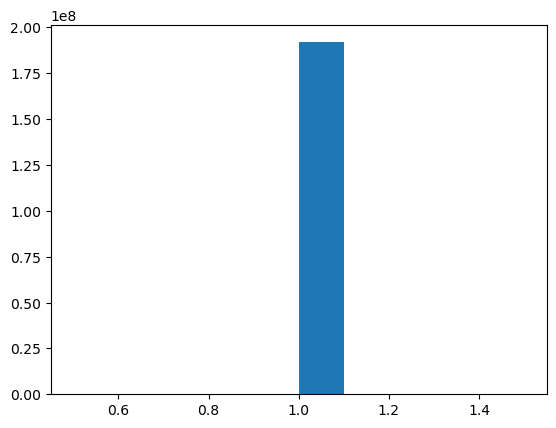

In [8]:
plt.hist(imgarr.flatten())

In [19]:
imgds.GetGeoTransform()

(943359.7539000002, 500.0, 0.0, 6825369.3209000025, 0.0, -500.0)

In [20]:
imgds.GetMetadata()

{'AREA_OR_POINT': 'Area'}

In [21]:
np.abs(-500)

500